<a href="https://colab.research.google.com/github/SahilD95/Market-BAsket/blob/main/Market_Basket_Analsyis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd. set_option("display.max_colwidth", None)

About the dataset
The dataset is a relational set of files describing customers' orders over time. The dataset is captured for the period of 2014 and 2015. The dataset has 38765 rows of the purchase orders of people from the grocery stores.
Problem Statement
The study is done on this dataset to understand the association of items with each other as well as to understand the support, lift, confidence of the items. Finding the association by conducting market basket analysis will allow for to understand which items are always in demand, which products are not doing well standalone but can perform better when clubbed and so on.

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
df = pd.read_csv("/content/drive/MyDrive/Groceries_data.csv")
df

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4
...,...,...,...,...,...,...,...
38760,4471,2014-08-10,sliced cheese,2014,8,10,6
38761,2022,2014-02-23,candy,2014,2,23,6
38762,1097,2014-04-16,cake bar,2014,4,16,2
38763,1510,2014-03-12,fruit/vegetable juice,2014,3,12,2


In [55]:
df.head()

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4


In [56]:
df.head()

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4


In [57]:
df['Date']=pd.to_datetime(df.Date)

In [58]:
df['day'] = df['Date'].apply(lambda x:x.day)
df['month'] = df['Date'].apply(lambda x:x.month)
df['year'] = df['Date'].apply(lambda x:x.year)

In [59]:
df['date_name'] = df['Date'].dt.day_name()

In [60]:
df.head()

,Member_number,Date,itemDescription,year,month,day,day_of_week,date_name
0,1808,2015-07-21,tropical fruit,2015,7,21,1,Tuesday
1,2552,2015-05-01,whole milk,2015,5,1,4,Friday
2,2300,2015-09-19,pip fruit,2015,9,19,5,Saturday
3,1187,2015-12-12,other vegetables,2015,12,12,5,Saturday
4,3037,2015-01-02,whole milk,2015,1,2,4,Friday


In [61]:
df.drop('Date', axis = 1, inplace = True)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   itemDescription  38765 non-null  object
 2   year             38765 non-null  int64 
 3   month            38765 non-null  int64 
 4   day              38765 non-null  int64 
 5   day_of_week      38765 non-null  int64 
 6   date_name        38765 non-null  object
dtypes: int64(5), object(2)
memory usage: 2.1+ MB


In [63]:
df.loc[(df['month']== 12), 'season'] = "winter"
df.loc[(df['month']>= 1) &(df['month'] <=2), 'season'] = "winter"
df.loc[(df['month']>= 3) &(df['month'] <=5), 'season'] = "spring"
df.loc[(df['month']>= 6) &(df['month'] <=8), 'season'] = "summer"
df.loc[(df['month']>= 9) &(df['month'] <=11), 'season'] = "fall"

In [64]:
df.head().sort_values('season')

,Member_number,itemDescription,year,month,day,day_of_week,date_name,season
2,2300,pip fruit,2015,9,19,5,Saturday,fall
1,2552,whole milk,2015,5,1,4,Friday,spring
0,1808,tropical fruit,2015,7,21,1,Tuesday,summer
3,1187,other vegetables,2015,12,12,5,Saturday,winter
4,3037,whole milk,2015,1,2,4,Friday,winter


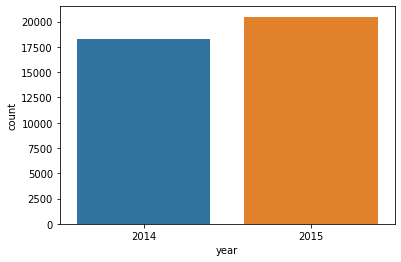

In [65]:
sns.countplot(x = 'year', data = df)

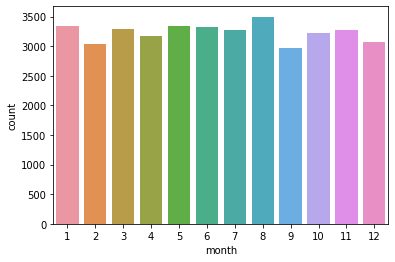

In [66]:
sns.countplot(x = 'month', data = df)

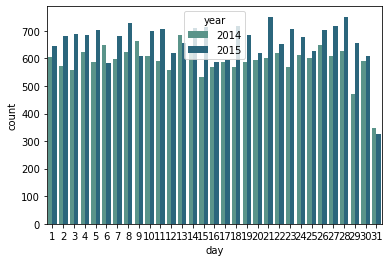

In [67]:
sns.countplot(x = 'day', data = df, hue = 'year', palette = 'crest')

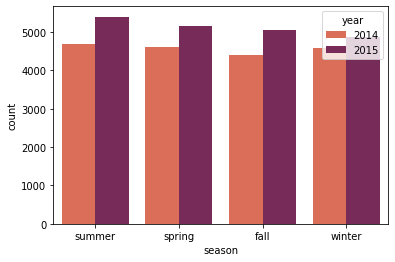

In [68]:
sns.countplot(x = 'season', data = df, hue = 'year', palette = 'rocket_r')

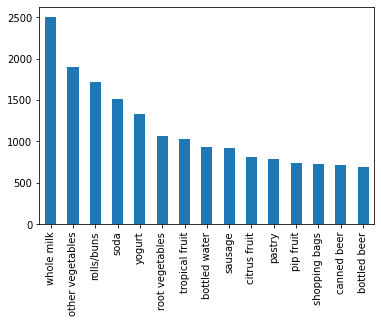

In [69]:
df['itemDescription'].value_counts()[:15].plot(kind = 'bar')
plt.show()

In [70]:
df = pd.read_csv("/content/drive/MyDrive/Groceries data.csv")

In [71]:
member = df
member

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4
...,...,...,...,...,...,...,...
38760,4471,2014-08-10,sliced cheese,2014,8,10,6
38761,2022,2014-02-23,candy,2014,2,23,6
38762,1097,2014-04-16,cake bar,2014,4,16,2
38763,1510,2014-03-12,fruit/vegetable juice,2014,3,12,2


In [72]:
transactions_members = [a[1]['itemDescription'].tolist() for a in list(member.groupby('Member_number'))]

In [73]:
transactions_members

[['soda',
  'canned beer',
  'sausage',
  'sausage',
  'whole milk',
  'whole milk',
  'pickled vegetables',
  'misc. beverages',
  'semi-finished bread',
  'hygiene articles',
  'yogurt',
  'pastry',
  'salty snack'],
 ['frankfurter',
  'frankfurter',
  'beef',
  'sausage',
  'whole milk',
  'soda',
  'curd',
  'white bread',
  'whole milk',
  'soda',
  'whipped/sour cream',
  'rolls/buns'],
 ['tropical fruit',
  'butter milk',
  'butter',
  'frozen vegetables',
  'sugar',
  'specialty chocolate',
  'whole milk',
  'other vegetables'],
 ['sausage',
  'root vegetables',
  'rolls/buns',
  'detergent',
  'frozen meals',
  'rolls/buns',
  'dental care',
  'rolls/buns'],
 ['other vegetables',
  'pip fruit',
  'root vegetables',
  'canned beer',
  'rolls/buns',
  'whole milk',
  'other vegetables',
  'hygiene articles',
  'whole milk',
  'whole milk',
  'frozen fish',
  'red/blush wine',
  'chocolate',
  'shopping bags',
  'dish cleaner',
  'packaged fruit/vegetables',
  'tropical fruit',
 

In [74]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(df).transform(df)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,D,M,_,a,b,c,d,e,f,h,...,m,n,o,p,r,s,t,u,w,y
0,False,True,True,False,True,False,False,True,False,False,...,True,True,False,False,True,False,False,True,False,False
1,True,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
2,True,False,False,False,False,True,False,True,False,False,...,True,True,True,True,True,True,True,False,False,False
3,False,False,False,True,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,True,...,True,True,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38760,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
38761,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
38762,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
38763,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [75]:
from mlxtend.frequent_patterns import apriori, association_rules



In [76]:
a = te.columns_

In [77]:
te_ary

array([[False,  True,  True, ...,  True, False, False],
       [ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [78]:
transactions_members = pd.DataFrame(te_ary, columns=a)
pf1 = transactions_members.describe()

In [79]:
transactions_members

,D,M,_,a,b,c,d,e,f,h,...,m,n,o,p,r,s,t,u,w,y
0,False,True,True,False,True,False,False,True,False,False,...,True,True,False,False,True,False,False,True,False,False
1,True,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
2,True,False,False,False,False,True,False,True,False,False,...,True,True,True,True,True,True,True,False,False,False
3,False,False,False,True,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,True,...,True,True,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38760,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
38761,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
38762,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
38763,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [80]:
f = pf1.iloc[0]-pf1.iloc[3]
a = f.tolist()
b = list(f.index)
item1 = pd.DataFrame([[a[r],b[r]]for r in range(len(a))], columns=['Count','Item'])
item1 = item1.sort_values(['Count'], ascending=False).head(50)

In [82]:
freq_items1 = apriori(transactions_members, min_support=0.06, use_colnames=True)
freq_items1.sort_values('support', ascending= False).head(10)

,support,itemsets


In [83]:
freq_items1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   support   0 non-null      float64
 1   itemsets  0 non-null      float64
dtypes: float64(2)
memory usage: 124.0 bytes
